# Stock Data Analysis

In [7]:
!pip install -r requirements.txt
!docker compose -f ../yfinance_db/docker-compose.yml up -d --build

import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from dotenv import load_dotenv

import sys
import os
from pathlib import Path

# add parent directry to sys.path
sys.path.append(str(Path.cwd().parent))

import library.yfinance as libyf

load_dotenv(dotenv_path='../.env')
DATABASE_URL = os.environ.get("DATABASE_URL").replace("db:5432", "localhost:5433")
print(DATABASE_URL)
engine = create_engine(DATABASE_URL)
print("Successfully connected to the database.")

with open('../parameter.json', 'r', encoding='utf-8') as f:
    json_string = f.read()
    parameter = json.loads(json_string)

POSTGRES_DB = os.environ.get("POSTGRES_DB")
print(POSTGRES_DB)


/bin/pip:6: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import load_entry_point
[+] Building 0.0s (0/0)  docker:default
[+] Building 0.0s (0/0)  docker:default
[+] Building 0.0s (0/0)  docker:default
[+] Building 0.0s (0/1)                                          docker:default
[+] Building 0.2s (1/2)                                          docker:default
 => [app internal] load build definition from Dockerfile                   0.0s
 => => transferring dockerfile: 198B                                       0.0s
 => [app internal] load metadata for docker.io/library/python:3.9-slim     0.1s
[+] Building 0.4s (1/2)                                          docker:default
 => [app internal] load build definition from Dockerfile                   0.0s
 => => transferring dockerfile: 198B                                       0.0s
 => [app internal] load metadata for docker.io/library/python:3.

In [ ]:
# plt.style.use('seaborn-v0_8-whitegrid')

# for ticker, df in stock_data.items():
#     print(ticker)
#     fig, ax = plt.subplots(figsize=(15, 8))
#     ax.plot(df.index, df['Close'], label=ticker.upper())
#     ax.set_title(ticker, fontsize=20)
#     ax.set_xlabel('Date', fontsize=12)
#     ax.set_ylabel('Price (USD)', fontsize=12)
#     plt.show()
#     plt.close()

In [6]:
df = libyf.Ticker.get_data(tickers=['aapl', 'msft', 'goog'])

NameError: name 'libyf' is not defined

['goog', 'aapl', 'meta', 'amzn', 'msft']
Successfully connected to the database.
Successfully loaded data for goog_1m
Successfully connected to the database.
Successfully loaded data for aapl_1m
Successfully connected to the database.
Successfully loaded data for meta_1m
Successfully connected to the database.
Successfully loaded data for amzn_1m
Successfully connected to the database.
Successfully loaded data for msft_1m


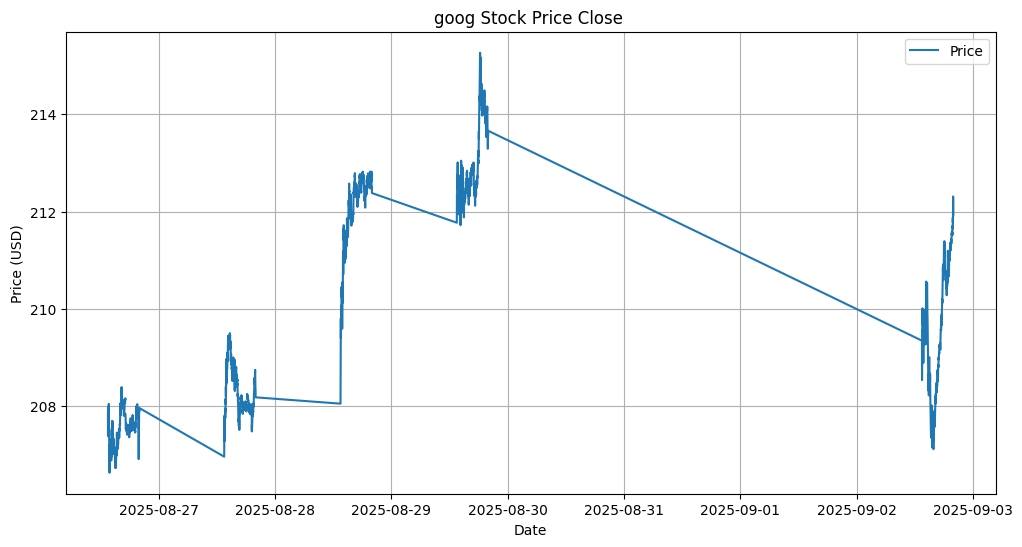

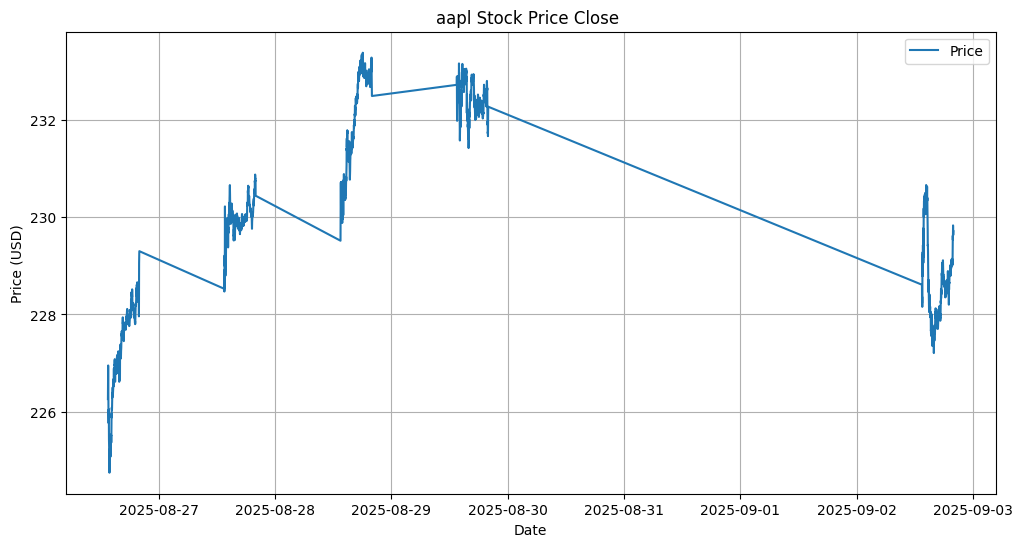

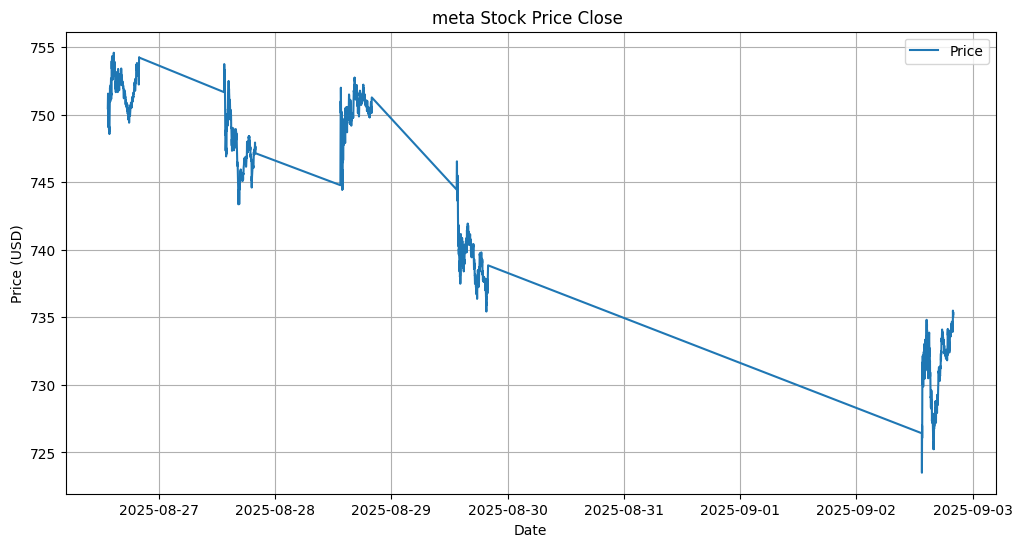

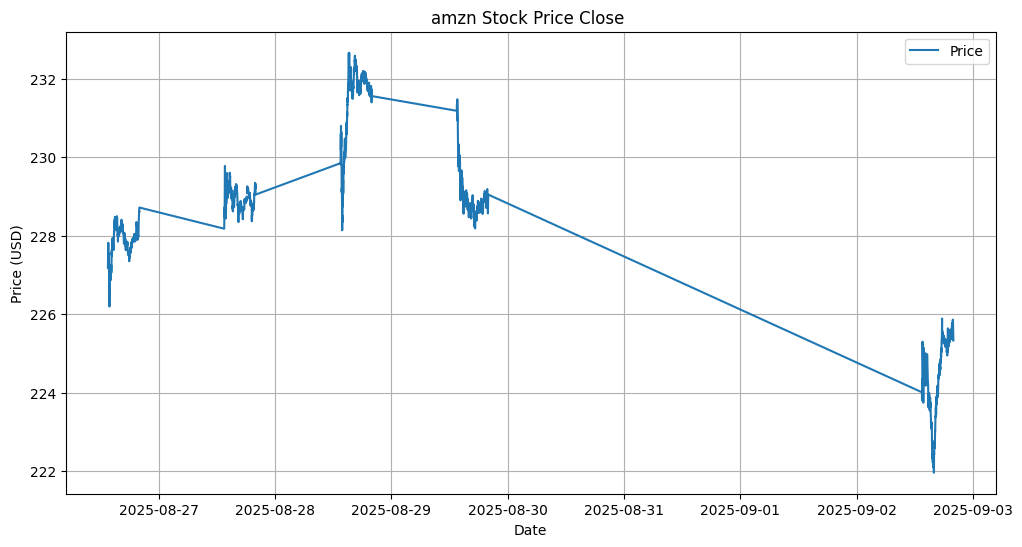

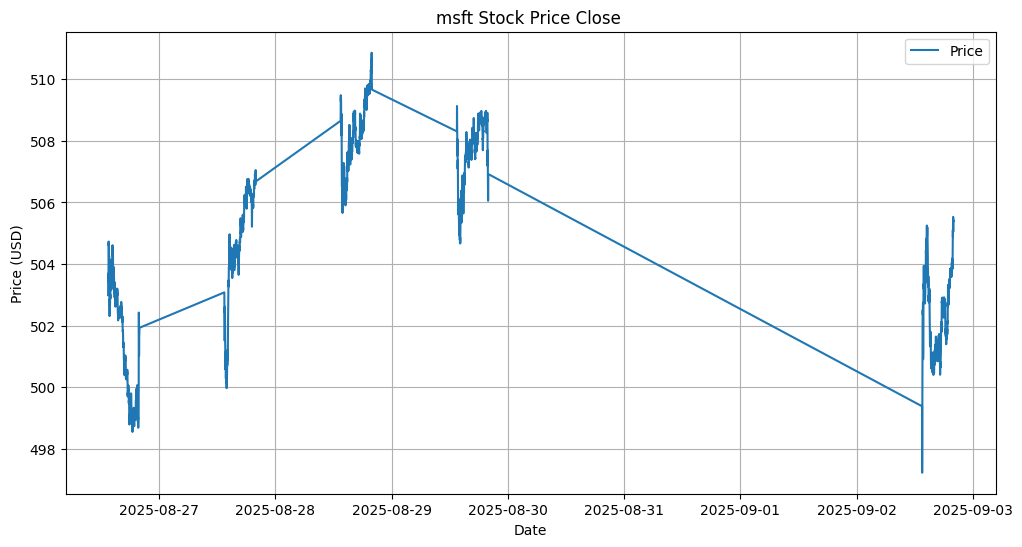

In [ ]:
from library import yfinance

stock = yfinance.Stock(interval='1m')
# stock.log_diff()
stock.plot()

count    1942.000000
mean      210.108463
std         2.267970
min       206.630096
25%       207.946255
50%       209.577499
75%       212.380005
max       215.264999
Name: goog, dtype: float64


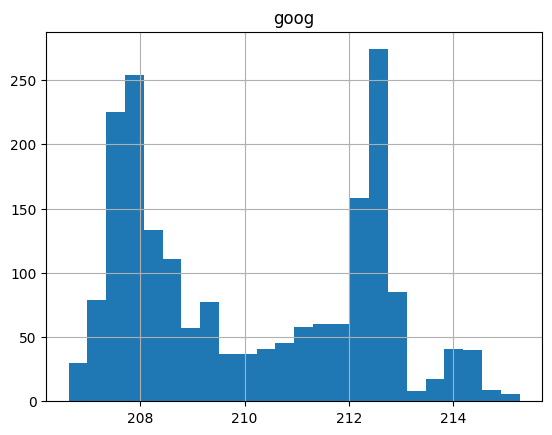

count    1943.000000
mean      230.086868
std         2.077346
min       224.744995
25%       228.269096
50%       230.020004
75%       232.192551
max       233.380005
Name: aapl, dtype: float64


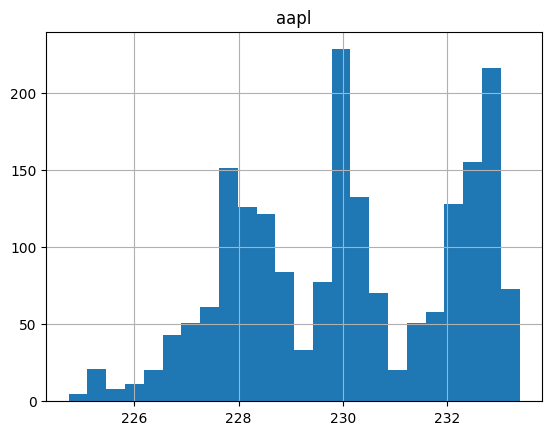

count    1942.000000
mean      744.108883
std         7.929959
min       723.500000
25%       737.910522
50%       747.369995
75%       750.770020
max       754.590027
Name: meta, dtype: float64


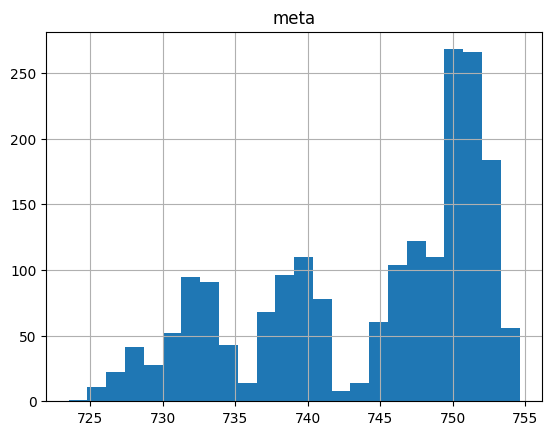

count    1940.000000
mean      228.353616
std         2.381588
min       221.960007
25%       227.687420
50%       228.705002
75%       229.240005
max       232.665802
Name: amzn, dtype: float64


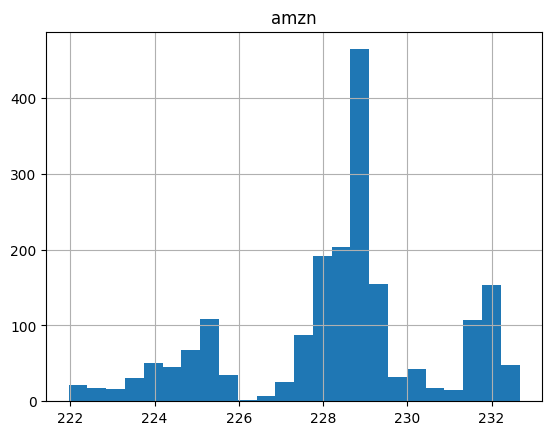

count    1942.000000
mean      504.864684
std         3.102617
min       497.225006
25%       502.440002
50%       504.930542
75%       507.799965
max       510.859985
Name: msft, dtype: float64


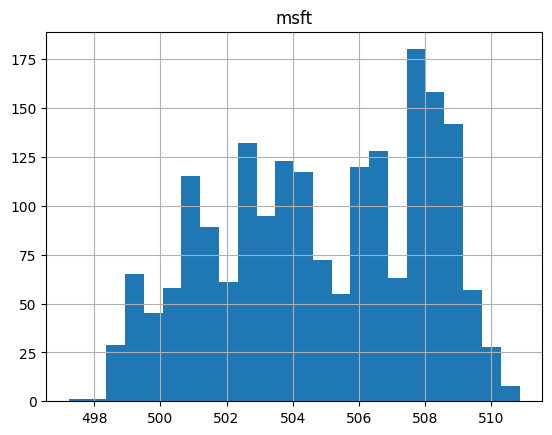

In [ ]:
for column in stock.prices.columns:
    print(stock.prices[column].describe())
    stock.prices[column].hist(bins=24)
    plt.title(column)
    plt.show()
    plt.close()

In [ ]:
stock.VAR.VAR(36)

ADF
                           goog         aapl         meta         amzn  \
adf_stat              -1.527948    -2.375579    -0.902445    -0.937472   
p_value                0.519643     0.148748     0.787166     0.775382   
used_lag               2.000000    21.000000    25.000000     8.000000   
n_obs               1939.000000  1921.000000  1916.000000  1931.000000   
critical_value_1%     -3.433727    -3.433759    -3.433768    -3.433741   
critical_value_5%     -2.863032    -2.863046    -2.863050    -2.863038   
critical_value_10%    -2.567564    -2.567572    -2.567574    -2.567567   

                           msft  
adf_stat              -1.751364  
p_value                0.404861  
used_lag              20.000000  
n_obs               1921.000000  
critical_value_1%     -3.433759  
critical_value_5%     -2.863046  
critical_value_10%    -2.567572  
'VAR' object has no attribute 'fit'


In [ ]:
stock.AuotCorrelation(36)

,goog,aapl,meta,amzn,msft
0,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.001896,-0.074391,-0.021486,-0.010153,0.058759
2,-0.090113,-0.037722,-0.066532,-0.064313,-0.057600
3,-0.021768,-0.031294,-0.047734,-0.009803,-0.148557
4,0.018693,0.026904,0.003164,0.060074,-0.011345
5,-0.036082,-0.026506,-0.028887,-0.032308,0.059719
6,-0.018814,-0.042787,-0.046790,-0.060372,-0.016056
7,-0.007066,0.018082,-0.086502,-0.058019,-0.008402
8,0.056303,-0.011580,0.007347,-0.023059,-0.004483
9,-0.015543,-0.047129,0.067163,0.022631,-0.029231
